In [22]:
from fastai.vision.all import *

In [23]:
path = untar_data(URLs.MNIST_SAMPLE)

In [24]:
(path/'train').ls(), (path/'valid').ls()

((#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')],
 (#2) [Path('/root/.fastai/data/mnist_sample/valid/7'),Path('/root/.fastai/data/mnist_sample/valid/3')])

In [25]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [26]:
im3 = Image.open(threes[1])
# Image.open(threes[2])
# Image.open(threes[3])
im3

In [27]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:26,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [28]:
three_tensors = [tensor(Image.open(o)) for o in threes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
# len(three_tensors), len(seven_tensors)
# three_tensors.shape, seven_tensors.shape 

6131


<Axes: >

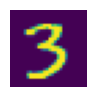

In [29]:
print(len(three_tensors))
show_image(three_tensors[1])

In [30]:
# mean calc : required float conversion : general scaling 0 : 1 
# 
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
print(stacked_threes.shape, stacked_sevens.shape)
print(stacked_threes.ndim )
# print(show_image(stacked_threes[0]))
# print(show_image(stacked_threes[2]))

torch.Size([6131, 28, 28]) torch.Size([6265, 28, 28])
3


<Axes: >

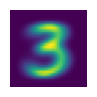

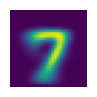

In [31]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)
show_image(mean3);
show_image(mean7)

In [32]:
# MAE : mean absoule error 
# RMSE : root mean of squared error 
dist3_mae = (stacked_threes[0] - mean3).abs().mean()
print('dist3 MAE: ',dist3_mae)
dist3_rmse = ((stacked_threes[0] - mean3)**2).mean().sqrt() 
print('dist3 RMSE: ',dist3_rmse)

dist3 MAE:  tensor(0.1074)
dist3 RMSE:  tensor(0.1912)


In [33]:
# MAE loss using builtin torch method
F.l1_loss(stacked_threes[0], mean7), F.l1_loss(stacked_threes[0], mean3)

(tensor(0.1441), tensor(0.1074))

In [34]:
# RMSE loss using built-in torch method : torch.nn.functional
F.mse_loss(stacked_threes[0], mean7), F.mse_loss(stacked_threes[0], mean3)

(tensor(0.0773), tensor(0.0366))

In [35]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)
# arr, tns
# tns[0]
# tns[0,1:]
# tns.type()

tns + 1 , tns * 1.25, tns / 1.1

(tensor([[2, 3, 4],
         [5, 6, 7]]),
 tensor([[1.2500, 2.5000, 3.7500],
         [5.0000, 6.2500, 7.5000]]),
 tensor([[0.9091, 1.8182, 2.7273],
         [3.6364, 4.5455, 5.4545]]))

In [36]:
# validation tensors from dataset : model evaulation 
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])    # creating a matrix of image tensors
valid_3_tens = valid_3_tens.float()/255    # converting pixel vals as flaot -> scaling to (0->1)
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [37]:
# fucntion to output tensor : MAE of all images 
def mnist_dist(a,b): return (a-b).abs().mean((-1,-2))
valid_3_dist = mnist_dist(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape, (valid_3_tens - mean3).abs().shape 
# options : cosine similarity, RMSE, euclidian distance 

(tensor([0.1270, 0.1632, 0.1676,  ..., 0.1228, 0.1210, 0.1287]),
 torch.Size([1010]),
 torch.Size([1010, 28, 28]))

In [38]:
# function to reutrn pixel similarity to 3 (using MAE) 
def is_3(x) : return mnist_dist(x, mean3) < mnist_dist(x, mean7)

print(is_3(valid_3_tens))

accuracy_3 = is_3(valid_3_tens).float().mean() 
accuracy_7 = (1- is_3(valid_7_tens).float()).mean() 

print('accuracy 3 :', accuracy_3.item())
print('accuracy 7 :', accuracy_7.item())
print('accuracy overall :', torch.stack([accuracy_3, accuracy_7]).mean())

tensor([ True, False, False,  ...,  True,  True, False])
accuracy 3 : 0.9168316721916199
accuracy 7 : 0.9854085445404053
accuracy overall : tensor(0.9511)


###   machine learning classifier 
1. initialize random wights
2. make predictions -> calculate model accuracy
3. calculate gradient -> calculates change in weights affect on the loss
4. change weights based on gradient calculations
5. re-iterate to step-2

* weight initialize : random weights
* loss : testing the effectiveness of weights
* step : try current weight: increase/decrease weights : calculate direction (inc or dec)
          -> calculating gradient : applying updated weights (inc/dec) : repeat steps
* stop : re-iterate step till : epochs reached, accuracy gets worse, time runs out 
  

In [39]:
def f(x): return x**2
plot_function(f, 'x', 'x**2')

NameError: name 'plot_function' is not defined